In [ ]:
import sys
import os
import time
import glob
import numpy as np
import matplotlib.pyplot as plt
import mne
import mne
from mne.time_frequency import tfr_multitaper

In [3]:
def mne_multitaper_concate(iStims, path, freqs, fmin, fmax, tmin, tmax):


    n_cycles = freqs / 2.

    sample_rate = 500
    
    all_epochs = []
    file_list = []

    ################## Epoch:
    
    tic = time.perf_counter()

    all_epochs = []
    file_list = []
    all_annotations = None
    
    ################## Epoch:
    
        # Adding all same events in one list
    for iStim in iStims:
        for i in range(1, 33):
            dir_path = os.path.join(path, f"RM{str(i).zfill(2)}/")
        
            # Check if the directory exists before listing files
            if os.path.exists(dir_path):
                # List files in the directory and filter by the stimulus and file extension
                file_list.extend([dir_path+f for f in os.listdir(dir_path) if iStim in f ])
    
    for file in file_list:
        file_epoch = mne.read_epochs(file, verbose=False)
        
        if file_epoch.annotations is not None:
            if all_annotations is None:
                all_annotations = file_epoch.annotations
            else:
                all_annotations += file_epoch.annotations
                
        
        all_epochs.append(file_epoch)
    # Concatenating epoch files
    concatenated_epochs = mne.concatenate_epochs(all_epochs)
   
    if all_annotations is not None:
        concatenated_epochs.set_annotations(all_annotations)

    #concatenated_epochs.apply_baseline(baseline=(-1, 0))
    # power analysis:
    power = concatenated_epochs.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, decim=10, return_itc=False, average=True, picks="eeg", n_jobs=-1)
    power_log = power.apply_baseline(mode='logratio', baseline=(-1, 0))

    if path == "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/First_Epoch_files/RM/":    
        if iStims == ["101", "103","105","107"]:
            cond = "first_irr"
        elif iStims == ["102", "104","106","108"]:
            cond = "first_reg"
    if path == "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/Second_Epoch_files/RM/":         
        if iStims == ["101","102","105","106"]:
            cond = "sec_subj"
        elif iStims == ["103","104","107","108"]:
            cond = "sec_obj"
        elif iStims == ["101","103","105","107"]:
            cond = "sec_irr"
        elif iStims == ["102","104","106","108"]:
            cond = "sec_reg"
    
    tfr_name = "RM_"+cond+"-tfr.h5"
    os.chdir("/home/pdrabbe/researchdrive/RITA/Pieter/Concatenated_events/")
    mne.time_frequency.write_tfrs(tfr_name, power_log, overwrite=True, verbose=True)
    print("TFR file saved")    
    
    # extract power values to NumPy array
    final_array = power_log.crop(tmin = tmin, tmax = tmax, include_tmax = True).data # shape: chan x freq x time 
    #print(power.freqs) # debug step    

    # Saving the NumPy array file on the local output:
    file_name = "RM_"+cond+".npy"
    print("Saving file {}".format(file_name))
    np.save(file_name, final_array)
    print("NumPy array file saved")
    toc = time.perf_counter()
    print(f"Processed the file in {toc - tic:0.4f} seconds")
    os.chdir('/home/pdrabbe')

    return power_log
            


In [4]:
#test cell
first_irr= ["101", "103","105","107"]
first_reg = ["102", "104","106","108"]
sec_sub = ["101","102","105","106"]
sec_obj = ["103","104","107","108"]
sec_irr = ["101","103","105","107"]
sec_reg = ["102","104","106","108"]
fmin = 2
fmax = 60
freqs = np.arange(fmin, fmax, 1.)
tmin = -1
tmax = 1.1

# specifying the output returns an averageTFR object (average across events)
rm_first_irr =  mne_multitaper_concate(first_irr, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/First_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above
rm_first_reg =  mne_multitaper_concate(first_reg, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/First_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above
rm_sec_sub =  mne_multitaper_concate(sec_sub, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/Second_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above
rm_sec_obj =  mne_multitaper_concate(sec_obj, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/Second_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above
rm_sec_irr =  mne_multitaper_concate(sec_irr, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/Second_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above
rm_sec_reg =  mne_multitaper_concate(sec_reg, "researchdrive/RITA/WHAT I NEED/TFR notebooks/forward/Second_Epoch_files/RM/", freqs, fmin, fmax, tmin, tmax) # call to funciton above



/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
3983 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   35.4s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   38.4s remaining:   58.4s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   41.2s remaining:   27.1s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   44.1s remaining:   10.3s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   46.8s finished


TFR file saved
Saving file RM_first_irr.npy
NumPy array file saved
Processed the file in 133.8775 seconds


/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
3956 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   32.9s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   35.8s remaining:   54.5s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   38.4s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   41.3s remaining:    9.7s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   43.9s finished


TFR file saved
Saving file RM_first_reg.npy
NumPy array file saved
Processed the file in 123.6472 seconds


/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
3937 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   26.7s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   28.1s remaining:   42.8s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   29.9s remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   31.4s remaining:    7.4s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   32.5s finished


TFR file saved
Saving file RM_sec_subj.npy
NumPy array file saved
Processed the file in 156.1282 seconds


/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
4000 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   27.4s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   29.2s remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   30.9s remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   32.7s remaining:    7.6s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   34.2s finished


TFR file saved
Saving file RM_sec_obj.npy
NumPy array file saved
Processed the file in 141.6944 seconds


/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
3982 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   26.9s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   28.7s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   30.2s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   31.7s remaining:    7.4s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   33.0s finished


TFR file saved
Saving file RM_sec_irr.npy
NumPy array file saved
Processed the file in 114.5118 seconds


/tmp/ipykernel_11923/1998830800.py:43: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenated_epochs = mne.concatenate_epochs(all_epochs)


Not setting metadata
3955 matching events found
Applying baseline correction (mode: mean)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  58 | elapsed:   26.9s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  23 out of  58 | elapsed:   28.2s remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  35 out of  58 | elapsed:   29.9s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  47 out of  58 | elapsed:   31.4s remaining:    7.3s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   32.3s finished


TFR file saved
Saving file RM_sec_reg.npy
NumPy array file saved
Processed the file in 106.8521 seconds


In [99]:
tfr_list = [rm_first_irr, rm_first_reg, rm_sec_sub, rm_sec_obj, rm_sec_irr, rm_sec_reg]

min_val = min([tfr.data.min() for tfr in tfr_list]) 
max_val = max([tfr.data.max() for tfr in tfr_list])


In [115]:
# rm_first_irr.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="First Epoch Irregular - Pz")
# rm_first_reg.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="First Epoch Regular - Pz")
# rm_sec_sub.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Subject-First - Pz")
# rm_sec_obj.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Object-First - Pz")
# rm_sec_irr.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Irregular - Pz")
# rm_sec_reg.plot_joint(timefreqs=(0.54,14), tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Regular - Pz")

No baseline correction applied


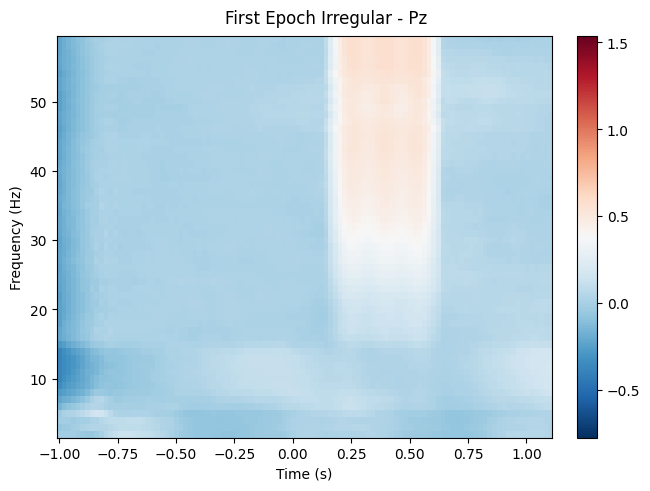

No baseline correction applied


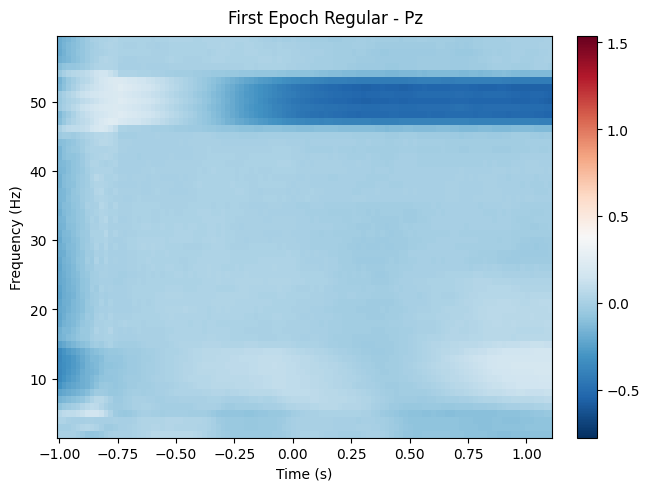

No baseline correction applied


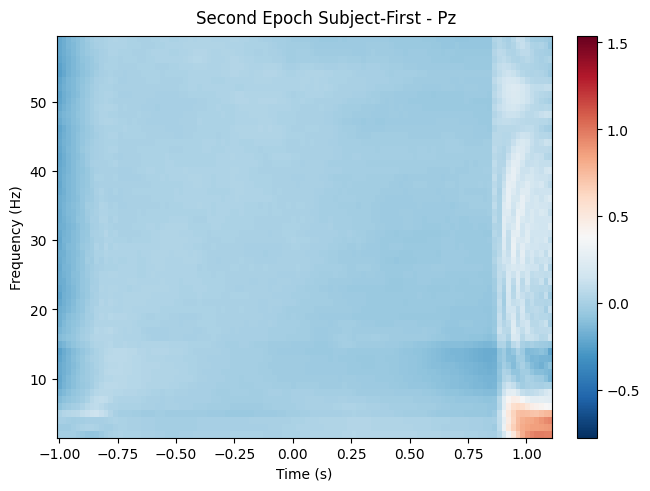

No baseline correction applied


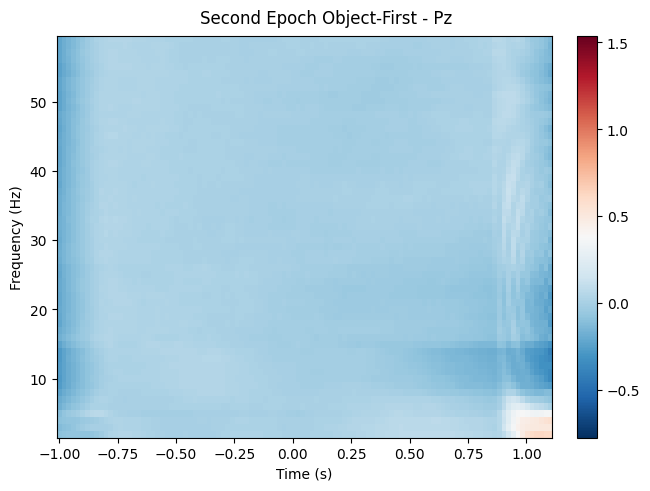

No baseline correction applied


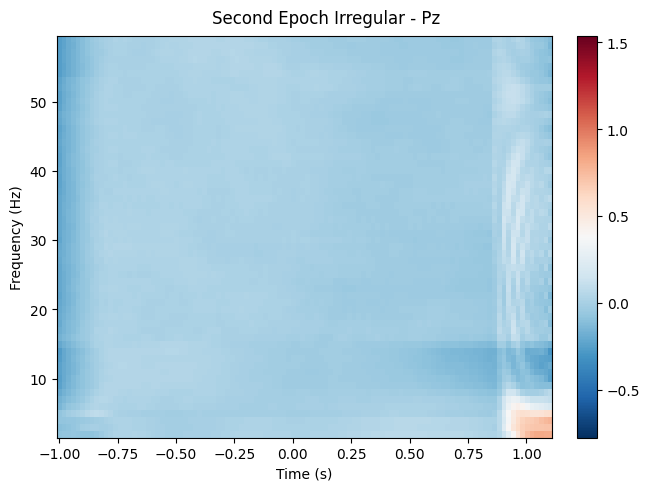

No baseline correction applied


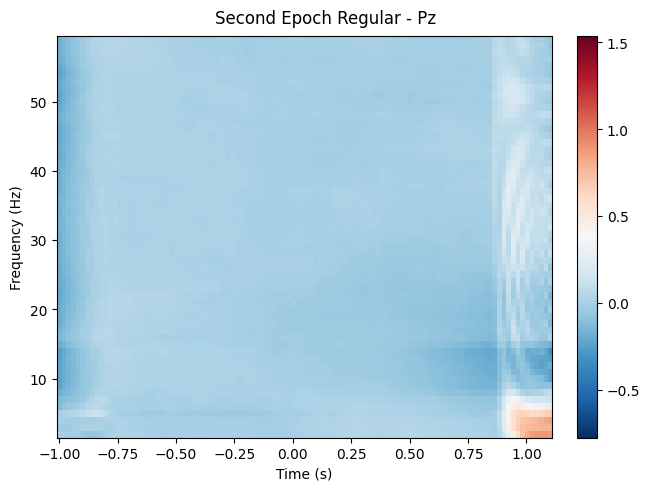

In [134]:

rm_first_irr.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="First Epoch Irregular - Pz")[0].savefig("first_irr_pz.png", dpi=300)
rm_first_reg.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="First Epoch Regular - Pz")[0].savefig("first_reg_pz.png", dpi=300)
rm_sec_sub.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Subject-First - Pz")[0].savefig("sec_sub_pz.png", dpi=300)
rm_sec_obj.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Object-First - Pz")[0].savefig("sec_obj_pz.png", dpi=300)
rm_sec_irr.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Irregular - Pz")[0].savefig("sec_irr_pz.png", dpi=300)
rm_sec_reg.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Pz"], title="Second Epoch Regular - Pz")[0].savefig("sec_reg_pz.png", dpi=300)

No baseline correction applied


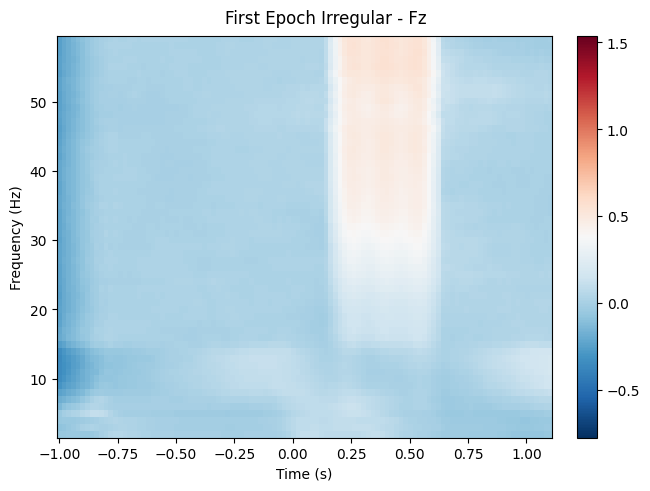

No baseline correction applied


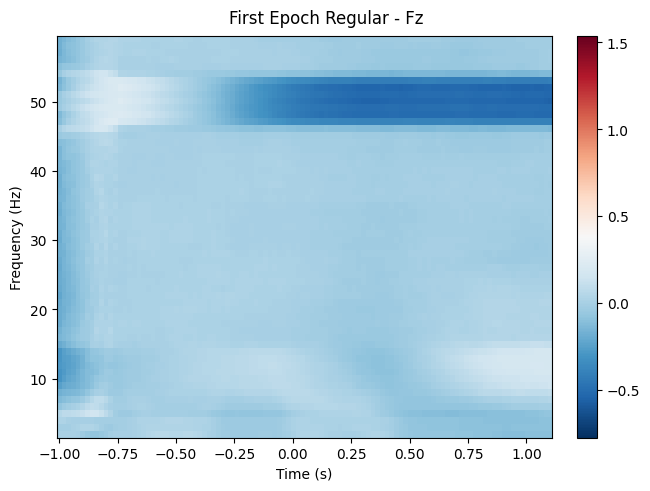

No baseline correction applied


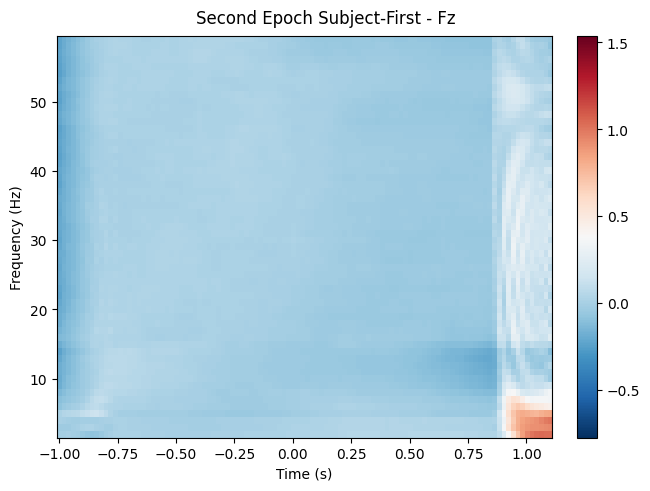

No baseline correction applied


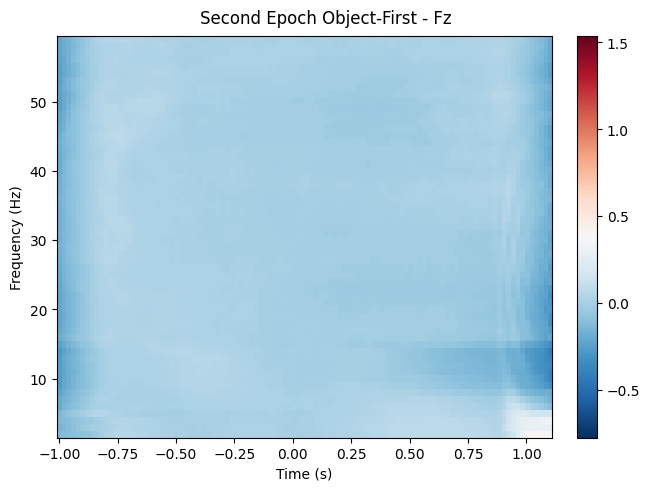

No baseline correction applied


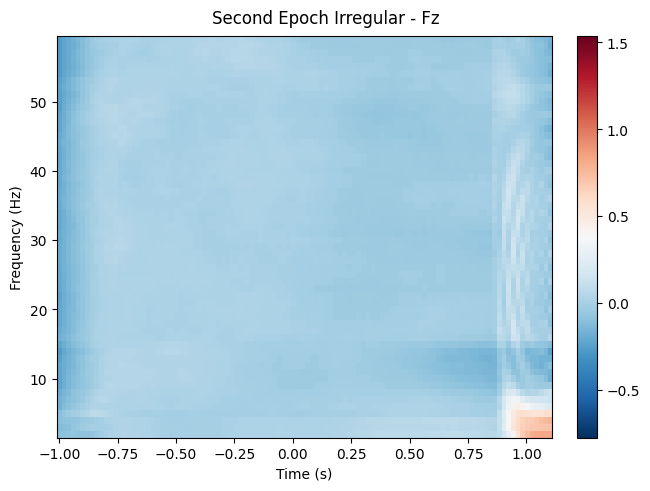

No baseline correction applied


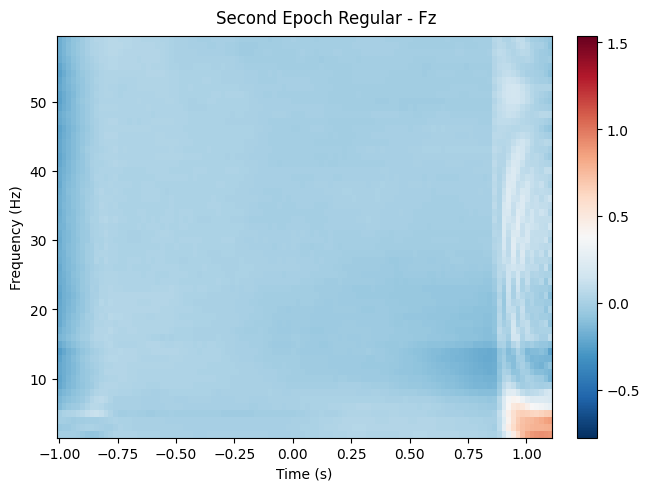

In [133]:

rm_first_irr.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="First Epoch Irregular - Fz")[0].savefig("first_irr_fz.png", dpi=300)
rm_first_reg.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="First Epoch Regular - Fz")[0].savefig("first_reg_fz.png", dpi=300)
rm_sec_sub.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="Second Epoch Subject-First - Fz")[0].savefig("sec_sub_fz.png", dpi=300)
rm_sec_obj.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="Second Epoch Object-First - Fz")[0].savefig("sec_obj_fz.png", dpi=300)
rm_sec_irr.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="Second Epoch Irregular - Fz")[0].savefig("sec_irr_fz.png", dpi=300)
rm_sec_reg.plot(tmax = 1.1, vlim=(min_val,max_val), picks=["Fz"], title="Second Epoch Regular - Fz")[0].savefig("sec_reg_fz.png", dpi=300)